In [30]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from google.colab import files

uploaded = files.upload()


Saving yelp_academic_dataset_business.json to yelp_academic_dataset_business.json


In [7]:
#Carga de datos sobre Negocios
biz_file = open('yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [26]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15585 entries, 0 to 15584
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    15585 non-null  object 
 1   full_address   15585 non-null  object 
 2   hours          15585 non-null  object 
 3   open           15585 non-null  bool   
 4   categories     15585 non-null  object 
 5   city           15585 non-null  object 
 6   review_count   15585 non-null  int64  
 7   name           15585 non-null  object 
 8   neighborhoods  15585 non-null  object 
 9   longitude      15585 non-null  float64
 10  state          15585 non-null  object 
 11  stars          15585 non-null  float64
 12  latitude       15585 non-null  float64
 13  attributes     15585 non-null  object 
 14  type           15585 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 1.7+ MB


Text(0, 0.5, 'Ocurrencias')

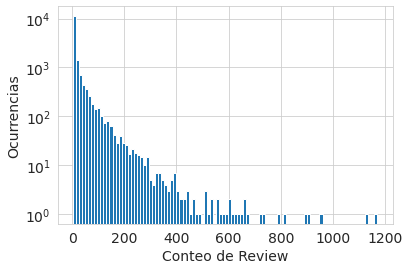

In [31]:
#Gráfico del histograma sobre el conteo de rewiews
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins = 100)
ax.set_yscale('log')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Conteo de Review', fontsize = 14)
ax.set_ylabel('Ocurrencias', fontsize = 14)

In [14]:
deciles = biz_df['review_count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Ocurrencias')

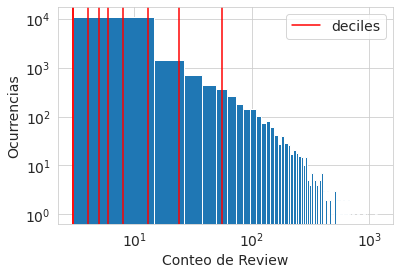

In [20]:
#Visualización de los Deciles en el Histograma
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
  handle = plt.axvline(pos, color = 'r')
ax.legend([handle], ['deciles'], fontsize = 14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Conteo de Review', fontsize = 14)
ax.set_ylabel('Ocurrencias', fontsize = 14)

### Aplicación de Transformación Logaritmica

In [ ]:
#Pasó Previo
biz_df2 = biz_df
biz_df2['log_review_count'] = np.log10(biz_df2['review_count']) 

Text(0, 0.5, 'Ocurrencias')

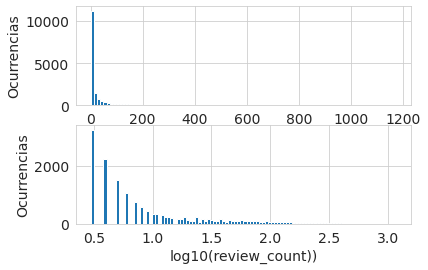

In [35]:
# Aplicación de Engineering Features - Función Log-Transformation
fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1 , bins=100)

ax1.tick_params(labelsize = 14)
ax1.set_xlabel('review_count', fontsize = 14)
ax1.set_ylabel('Ocurrencias', fontsize = 14)

# Transformación Logaritmica
biz_df2['log_review_count'].hist(ax=ax2 , bins=100)
ax2.tick_params(labelsize = 14)
ax2.set_xlabel('log10(review_count))', fontsize = 14)
ax2.set_ylabel('Ocurrencias', fontsize = 14)